In [35]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = np.matmul(A,theta_true)+np.random.normal(loc=0.0, scale=scale, size=(data_num,1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50,dim_theta))
y_test = np.matmul(A_test,theta_true)+np.random.normal(loc=0.0, scale=scale, size=(50,1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:

'''
Hints:
1. Use np.matmul() and la.inv() to solve for x in Ax = b.
2. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
theta_pred =  np.matmul(np.matmul(la.inv(np.matmul(A.T, A)),A.T), y_data)
print('Empirical theta', theta_pred.reshape(-1))

Empirical theta [0.99906199 1.00470744 0.99256598 0.99933367 1.01040448 1.00259537
 0.98545508 0.99965523 0.99805779 0.99988869]


In [37]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [38]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0
    
    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_
        
#         print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        '''
        grad = np.sign(deg_*abs(err)**(deg_-1)*x_) * (deg_*abs(err)**(deg_-1)*x_)
        l = abs(err)**deg_
        
        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]
        
    return loss, gradient

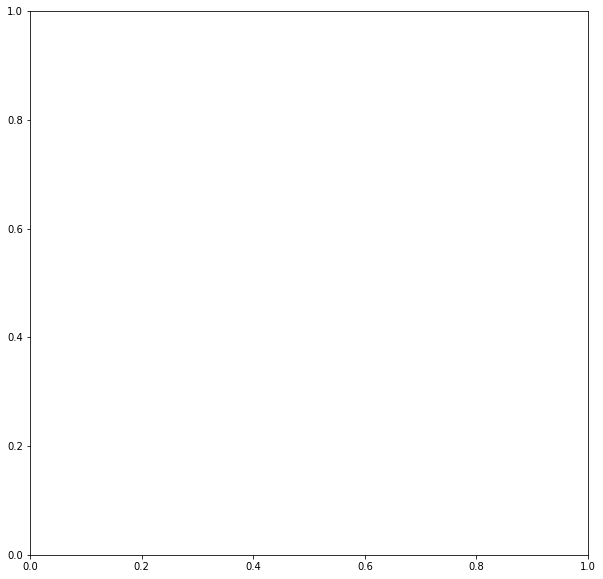

In [39]:
deg_ = 2
num_rep = 10
max_iter = 1000
fig, ax = plt.subplots(figsize=(10,10))
best_vals = dict()
test_exp_interval = 50
grad_artificial_normal_noise_scale = 0.

adam 0
adam done
[[-0.43563485]
 [-0.3232354 ]
 [-0.25305969]
 [-0.30426208]
 [-0.26627923]
 [-0.3959098 ]
 [-0.36670003]
 [-0.35656861]
 [-0.39783846]
 [-0.35483586]]
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
sgd 0


C:\Users\nacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\Users\nacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\Users\nacho\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\nacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sign


sgd done
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
adagrad 0
adagrad done
[[0.01050938]
 [0.02748065]
 [0.09842993]
 [0.08010182]
 [0.07386349]
 [0.05478004]
 [0.04408932]
 [0.0494155 ]
 [0.00497005]
 [0.0102883 ]]
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.


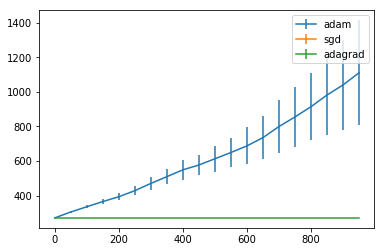

In [40]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []
    
    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)
            
        if method == 'adam':
#             print('Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            m = 0
            v = 0
            epsilon = 1e-8

        if method == 'adagrad':
#             print('Not implemented.')
            epsilon = 1e-8
            squared_sum = 0
            
        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []
        t = 1
        for t in range(max_iter):  
            idx = np.random.choice(data_num,batch_size)
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10,1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10,1))-0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)
            
            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)                
            
            if method == 'adam':
#                 print('Not implemented.')
                t=t+1
                m = beta_1*m + (1-beta_1)*(gradient)
                v = beta_2*v + (1-beta_2)*(gradient**2)
                m_hat = m/(1-beta_1**t)
                v_hat = v/(1-beta_2**t)
                theta_hat = theta_hat - lr * m_hat/(np.sqrt(v_hat) + epsilon)
            
#             elif method == 'adagrad':
# #                 print('Not implemented.')
# #                 squared_sum = squared_sum + gradient**2
# #                 theta_hat = theta_hat - (lr/((squared_sum+epsilon)**0.5)) * gradient
            
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient
        
        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
        
    print(method, 'done')
    print(theta_hat)
    x_axis = np.arange(max_iter)[::test_exp_interval]
    
    print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis=0)

    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0 
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se = np.std(test_loss_np,axis=0)/num_rep**0.5
    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    plt.legend()
    best_vals[method] = min(test_loss_mean)

No handles with labels found to put in legend.


Text(0.5,0,'Updates')

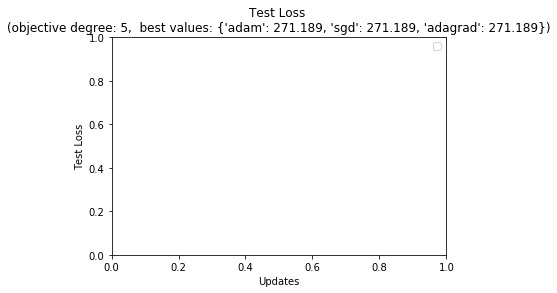

In [41]:
best_vals = {k: int(v*1000)/1000. for k,v in best_vals.items()} # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')